In [239]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [240]:
df = pd.read_csv('train.csv', sep=",")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [241]:
df["Age"].mean()

29.69911764705882

In [242]:
df['Embarked'].replace({'S': 0, 'C': 1, "Q": 2}, inplace=True)
df['Sex'].replace({'male': 0, 'female': 1}, inplace=True)
df["Age"] = df["Age"].fillna(df["Age"].mean()).astype(int)

In [261]:
# independent variables, input features, a matrix
X = df[["Pclass", "Age", "SibSp", "Parch", "Sex"]]

# dependent variable, target variable, a vector
y = df['Survived']

In [262]:
x = X.values #returns a numpy array
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled, columns=X.columns)

In [263]:
X

,Pclass,Age,SibSp,Parch,Sex
0,0.827377,-0.580044,0.432793,-0.473674,-0.737695
1,-1.566107,0.650112,0.432793,-0.473674,1.355574
2,0.827377,-0.272505,-0.474545,-0.473674,1.355574
3,-1.566107,0.419458,0.432793,-0.473674,1.355574
4,0.827377,0.419458,-0.474545,-0.473674,-0.737695
...,...,...,...,...,...
886,-0.369365,-0.195620,-0.474545,-0.473674,-0.737695
887,-1.566107,-0.810699,-0.474545,-0.473674,1.355574
888,0.827377,-0.041851,0.432793,2.008933,1.355574
889,-1.566107,-0.272505,-0.474545,-0.473674,-0.737695


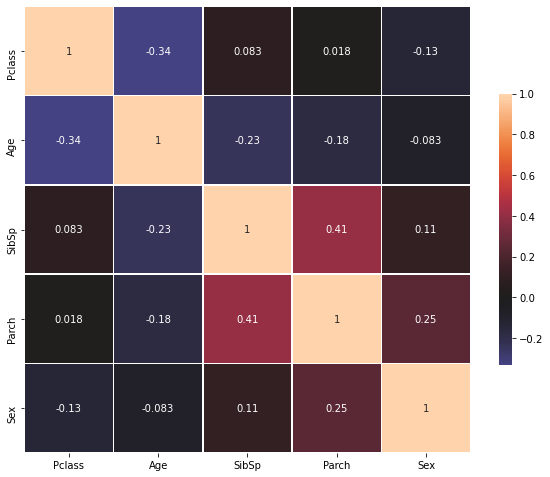

In [264]:
plt.figure(figsize=(10, 10))
sns.heatmap(X.corr(), center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.savefig("titanic_corr.png", dpi=150, format="png")

In [265]:
# Split the DataFrame into X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [266]:
X_train.head(3)

,Pclass,Age,SibSp,Parch,Sex
298,-1.566107,-0.041851,-0.474545,-0.473674,-0.737695
884,0.827377,-0.349390,-0.474545,-0.473674,-0.737695
247,-0.369365,-0.426275,-0.474545,2.008933,1.355574


In [267]:
X_test.head(3)

,Pclass,Age,SibSp,Parch,Sex
709,0.827377,-0.041851,0.432793,0.767630,-0.737695
439,-0.369365,0.111919,-0.474545,-0.473674,-0.737695
840,0.827377,-0.733814,-0.474545,-0.473674,-0.737695


In [268]:
model = LogisticRegression() #initialize the model
model.fit(X_train, y_train)   # trains the model:
model.score(X_train, y_train) # calculates accuracy

0.7844311377245509

In [269]:
model.score(X_test, y_test)

0.8161434977578476